In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [3]:
original_df = pd.read_csv('../../data/processed/netstats/netstats-threshold-0.5.csv', parse_dates=['date'])
original_df.head()

,date,density,global_cc
0,2020-01-30,0.193060,0.115381
1,2020-01-31,0.199320,0.116169
2,2020-02-01,0.211956,0.119353
3,2020-02-02,0.202179,0.119581
4,2020-02-03,0.184945,0.116071


In [4]:
df_cases = pd.read_csv('../../data/external/pandemic/owid-covid-data_US.csv', parse_dates=['date'])
df_cases_global = df_cases.copy()
df_cases_global = df_cases.groupby(by='date').agg(
    new_cases=pd.NamedAgg(column='new_cases', aggfunc='sum'),
    new_cases_smoothed=pd.NamedAgg(column='new_cases_smoothed', aggfunc='sum'),
)
df_cases_global.reset_index(inplace=True)
df_cases_global.tail()

,date,new_cases,new_cases_smoothed
836,2022-04-16,2451778.0,3730099.139
837,2022-04-17,1866485.0,3640452.141
838,2022-04-18,1952774.0,3309558.715
839,2022-04-19,4406042.0,3248654.571
840,2022-04-20,4350380.0,3187346.142


In [5]:
df_cases_USA = df_cases.query('iso_code == "USA"')
df_cases_USA = df_cases_USA[['date', 'new_cases', 'new_cases_smoothed']]
df_cases_USA = df_cases_USA[df_cases_USA['date'].dt.date <= date.fromisoformat('2022-02-03')]
df_cases_USA.to_csv("./../../data/processed/external/us_covid_cases.csv", index=False)
df_cases_USA.tail()

,date,new_cases,new_cases_smoothed
170806,2022-01-30,197945.0,505146.857
170807,2022-01-31,542235.0,450895.571
170808,2022-02-01,325402.0,426931.571
170809,2022-02-02,329513.0,384860.000
170810,2022-02-03,274798.0,351792.143


In [6]:
df_cases_global = df_cases_global[df_cases_global['date'].dt.date >= date.fromisoformat('2020-01-02')]
df_cases_global = df_cases_global[df_cases_global['date'].dt.date <= date.fromisoformat('2022-02-03')]
df_cases_global.to_csv("./../../data/processed/external/global_covid_cases.csv", index=False)
df_cases_global.tail()

,date,new_cases,new_cases_smoothed
760,2022-01-30,10119969.0,1.450135e+07
761,2022-01-31,11583997.0,1.393664e+07
762,2022-02-01,13994504.0,1.375212e+07
763,2022-02-02,14105205.0,1.346312e+07
764,2022-02-03,13934669.0,1.309224e+07


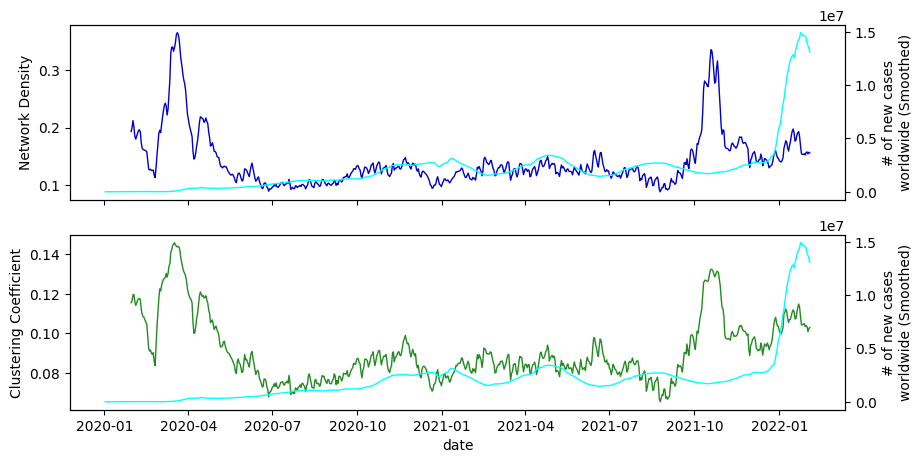

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10, 5))

# Plot Density
ax_0_dual = ax[0].twinx()
sns.lineplot(x='date', y='new_cases_smoothed', data=df_cases_global, ax=ax_0_dual, color='cyan', linewidth=1)
sns.lineplot(x='date', y='density', data=original_df, ax=ax[0], color='mediumblue', linewidth=1)
ax[0].set_ylabel('Network Density')
ax_0_dual.set_ylabel('# of new cases\nworldwide (Smoothed)')

ax_1_dual = ax[1].twinx()
sns.lineplot(x='date', y='new_cases_smoothed', data=df_cases_global, ax=ax_1_dual, color='cyan', linewidth=1)
sns.lineplot(x='date', y='global_cc', data=original_df, ax=ax[1], color='forestgreen', linewidth=1)
ax[1].set_ylabel('Clustering Coefficient')
ax_1_dual.set_ylabel('# of new cases\nworldwide (Smoothed)')

plt.savefig("../../graphs/Netstats-Global_New_Case.pdf", bbox_inches='tight')
plt.savefig("../../graphs/Netstats-Global_New_Case.png", bbox_inches='tight')
plt.show()